In [0]:
!pip install utils

In [0]:
!pip install unet

In [0]:
!pip3 install git+https://github.com/matterport/Mask_RCNN

  Cloning https://github.com/matterport/Mask_RCNN to /tmp/pip-req-build-bs4b5szd
  Running command git clone -q https://github.com/matterport/Mask_RCNN /tmp/pip-req-build-bs4b5szd
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-cp36-none-any.whl size=56923 sha256=336460c0df5d1e132379bd8f1576ec1172ea52375c4f6988c98cd4d60bd5bba0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3526ycy1/wheels/82/1d/ca/a183f936652a341bf5f9f95e87de6c86cd45b136b82b7bc1b1
Successfully built mask-rcnn


In [0]:
!pip3 install git+https://github.com/waleedka/coco.git#subdirectory=PythonAPI

  Cloning https://github.com/waleedka/coco.git to /tmp/pip-req-build-qzs884s9
  Running command git clone -q https://github.com/waleedka/coco.git /tmp/pip-req-build-qzs884s9
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275059 sha256=619058e8d9c5daa7c9ececa4f305298628633b7b8713c19ae941582232a571e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-i11ab3tz/wheels/b4/64/d2/36f24ec8ae3838ab50b0f8979fbf579ea02b78de923785d2ae
Successfully built pycocotools


In [0]:
!pip3 install git+https://github.com/crowdAI/crowdai-mapping-challenge-mask-rcnn

  Cloning https://github.com/crowdAI/crowdai-mapping-challenge-mask-rcnn to /tmp/pip-req-build-sicht7ri
  Running command git clone -q https://github.com/crowdAI/crowdai-mapping-challenge-mask-rcnn /tmp/pip-req-build-sicht7ri
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-cp36-none-any.whl size=63798 sha256=b4a7eca84f3c6bc544000a4deef55c2b58c70046e6e11d650060a8b94e5bf343
  Stored in directory: /tmp/pip-ephem-wheel-cache-3atn4ca6/wheels/96/ee/43/de437fadd230e17fac20fdd6eff8b6329b6a6afb3272850041
Successfully built mask-rcnn


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import random
import math
import time
import json
import cv2
import numpy as np
import pandas as pd 
import skimage.io as io
from skimage.morphology import label
from skimage.data import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot, transforms
from IPython.display import clear_output

In [0]:
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from skimage.color import label2rgb
from matplotlib.patches import Rectangle
from skimage.io import imread

In [5]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
#import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from skimage.util import montage as montage2d
#from keras import models, layers
from tensorflow.compat.v2.keras import layers, models

import tensorflow.compat.v2.keras.backend as K
from tensorflow.compat.v2.keras.optimizers import Adam
from tensorflow.compat.v2.keras.losses import binary_crossentropy
from tensorflow.compat.v2.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.compat.v2.keras.metrics import Accuracy, BinaryAccuracy, CategoricalAccuracy


In [7]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

import tensorflow.compat.v2.keras.backend as K
from tensorflow.compat.v2.keras.optimizers import Adam
from tensorflow.compat.v2.keras.losses import binary_crossentropy
from tensorflow.compat.v2.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
ROOT_DIR = os.getcwd()#identifico mi ruta principal
PATH = "/drive/My Drive/DataSets/Dataset concurso/"
sys.path.append(ROOT_DIR)#actualizo que esta es mi ruta principal
ROOT = ROOT_DIR + PATH
premodelo = os.path.join(ROOT, "Otros/") #modelo preentrenado
logs = os.path.join(ROOT, "Otros/" "logs/")

In [0]:
trn = os.path.join(ROOT, "train/")
tst = os.path.join(ROOT, "test /")

In [0]:
path_images = trn + "images/"
trn_images = !ls -1 "{path_images}"

In [0]:
tst_images = tst + 'images/'
tst_images = !ls -1 "{tst_images}"

In [0]:
json_path = trn+'labels/'
trn_json = !ls -1 "{json_path}"

In [0]:
msk = os.path.join(ROOT, "mask/")
msk_images = !ls -1 "{msk}"

In [0]:
json_path

'/content/drive/My Drive/DataSets/Dataset concurso/train/labels/'

In [0]:
#bloque importante
def getPolygonDataFromString(sampleSource):

  toReturn = []

  #elimino caracteres inncesarios
  #sampleSource = sampleSource.replace("POLYGON ((","")
  #sampleSource = sampleSource.replace("))","")
  sampleSource = sampleSource[10: -2]
  
  #convierto en lista de par de coordenadas
  #convierte cadena e texto en lista
  stringArray = sampleSource.split(",")
  
  # get each coordinate value
  for entry in stringArray:
    entry = entry.lstrip() #elimina caracteres vacíos que están a la izquierda
    xyEntry = entry.split(" ") # crea las coordenadas
    
    #separamos las coordenadas
    xEntryS = xyEntry[0] 
    yEntryS = xyEntry[1] 
    
    #redondeamos a 5 decimales
    xEntry = GetFloatFromString(xEntryS, 5)
    yEntry = GetFloatFromString(yEntryS, 5)    

    toReturn.append((xEntry,yEntry))

  return toReturn

def GetFloatFromString(data, decimalTrimAmount = 3):
  data = data.strip() # remove spaces
      
  pointIndex = data.find(".")
  
  if (pointIndex == -1):
    return float(data) # data has no decimal part

  decimalChars = len(data) - pointIndex
  finalLength = pointIndex + min(decimalChars,decimalTrimAmount) + 1
  data = data[0:finalLength]

  return float(data)

def cropImageUsingPolygon(source,polygonData):
  # read image as RGB and add alpha (transparency)
  im = Image.open(source).convert("RGBA")

  # convert to numpy (for convenience)
  imArray = np.asarray(im)

  # create mask
  maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
  ImageDraw.Draw(maskIm).polygon(polygonData, outline=1, fill=1)
  mask = np.array(maskIm)

  # assemble new image (uint8: 0-255)
  newImArray = np.empty(imArray.shape,dtype='uint8')

  # colors (three first columns, RGB)
  newImArray[:,:,:3] = imArray[:,:,:3]


  # transparency (4th column)
  newImArray[:,:,3] = mask*255
  Image.fromarray(newImArray, "RGBA")
  plt.imshow(newImArray)
  
  #I = io.imread(newImArray)
  #plt.imshow(I)

  #crop image using polygon bounds
  #where = np.array(np.where(mask))
  #x1, y1 = np.amin(where, axis=1)
  #x2, y2 = np.amax(where, axis=1)
  #sub_image = newImArray[x1:x2, y1:y2]

  # back to Image from numpy
  #cropImage = Image.fromarray(sub_image, "RGBA")
  #cropImage.save(destination)

In [0]:
####################################################################

In [0]:
#bloque importante
def json_img_xy(js_path, trn_js):
  img_df = [] #creo una lista ara guardar los metadatos de la imagen
  full_polygon = [] #creo una lista para poder guardar la coordenada de los poligonos
  for i in range(len(trn_js)-5419):#aqui se deben cargar todas las imágenes----------------
    jsp = js_path + trn_json[i]
    with open(jsp, 'r') as f:
      annot_data = json.load(f)
    img_df.append(pd.DataFrame(annot_data))#debo retornar image_df
    #guardo coordenadas
    #for position in annot_data['features']['xy']:
      #polygonID = position["properties"]["feature_type"]
      #polygonString = position["wkt"]
      #polygon = getPolygonDataFromString(polygonString)
      #print(polygon)
      #full_polygon.append(polygon)#debo retornar full_polygon
  return img_df#, full_polygon

In [0]:
#bloque importante
def load_json_xy(path):
  full_polygon = []#creo una lista onde guardaré las coordenadas
  with open(path) as contenido:
    jsonData = json.load(contenido)
    for position in jsonData['features']['xy']:
      #extraigo coordenadas
      polygonID = position["properties"]["feature_type"]
      polygonString = position["wkt"]
      polygon = getPolygonDataFromString(polygonString)
      full_polygon.append(polygon)#almaceno las coordenadas en una lista
  
  return full_polygon

In [0]:
#bloque importante
def rows_to_segmentationp(in_im, x_yjs): #in_img es la ruta de la imagen
    #image_df[0]['metadata']['img_name'] es el nombre de la imagen tomado del json
    #in_img = imread(in_im)

    xx, yy = np.meshgrid(range(in_im.shape[0]), #obtenemos las coordenadas matriciales de la imagen
                         range(in_im.shape[1]),
                         indexing='ij')
    out_img = np.zeros(in_im.shape[:2]) #creamos una matriz nula
    #x_y = load_json_xy(js_path + trn_js[i])
    it = len(x_yjs)
    for a_row in range(it):#iteramos todas las coordenadas
      xy_vec = np.asarray(x_yjs[a_row])  #aqui dividimos en dos coordenadas
      #base = pyplot.gca().transData #grafica segmentos
      rot = transforms.Affine2D().rotate_deg(-90)
      #plt.plot(xy_vec[:, 1], xy_vec[:, 0], transform = rot + base)#para rotar la grafica transform = rot + base)
      xy_path = Path(xy_vec)
      out_img += xy_path.contains_points(np.stack([yy.ravel(), 
                                                     xx.ravel()], -1)).reshape(out_img.shape)
    return out_img

In [0]:
#bloque importante
def segdata(path_images, img_df, json_path, trn_json, i):
  img_data = imread(path_images + img_df[i]['metadata']['img_name'])#cargo la imagen segun su nombre
  x_y = load_json_xy(json_path + trn_json[i]) #cargo la etiqueta
  out_img = rows_to_segmentationp(img_data, x_y)#asocio la imagen con su etiqueta json 
  #m_axs[0].imshow(img_data)
  #m_axs[1].imshow(label2rgb(image=img_data, label=out_img, bg_label = 0))
  #m_axs.imshow(label2rgb(image=img_data, label=out_img, bg_label = 0))
  return img_data, out_img

###Bloques de prueba

In [0]:
#bloque importante, demora una hora
#len(trn_json)-5596
img_df = json_img_xy(json_path, trn_json)
fig, m_axs = plt.subplots(1, 2, figsize = (10, 10))
j = 0
dim = (300, 300)
for i in range(0, 2):
    #c_ax -> features, c_df->metadata
    c_ax, c_df = zip(m_axs.flatten(), (img_df[i]))
    img_data = imread(path_images + img_df[i]['metadata']['img_name'])
    img_data = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)
    m_axs[j].imshow(img_data)
    j+=1
    if j == 2:
      j = 0
    

KeyboardInterrupt: ignored

In [0]:
#bloque importante
def rows_to_segmentation(imagen_df, trn_js, path_img, js_path, i): #in_img es la ruta de la imagen
    #image_df[0]['metadata']['img_name'] es el nombre de la imagen tomado del json
    in_img = imread(path_img + imagen_df[i]['metadata']['img_name'])
    xx, yy = np.meshgrid(range(in_img.shape[0]), #obtenemos las coordenadas matriciales de la imagen
                range(in_img.shape[1]),
               indexing='ij')
    out_img = np.zeros(in_img.shape[:2]) #creamos una matriz nula
    x_y = load_json_xy(js_path + trn_js[i])
    it = len(x_y)
    for a_row in range(it):#iteramos todas las coordenadas
      xy_vec = np.asarray(x_y[a_row])  #aqui dividimos en dos coordenadas
      base = pyplot.gca().transData
      rot = transforms.Affine2D().rotate_deg(-90)
      plt.plot(xy_vec[:, 1], xy_vec[:, 0])#para rotar la grafica transform = rot + base)
      xy_path = Path(xy_vec)
      out_img += xy_path.contains_points(np.stack([yy.ravel(), 
                                                     xx.ravel()], -1)).reshape(out_img.shape)
    return out_img

In [0]:
#bloque de prueba de segmentación
in_img = imread(path_images + img_df[0]['metadata']['img_name'])
x_y = load_json_xy(json_path + trn_json[0])
rows_to_segmentationp(in_img, x_y)

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]])

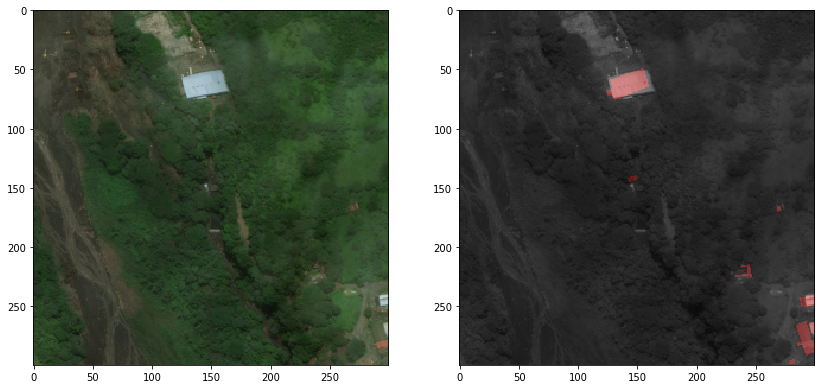

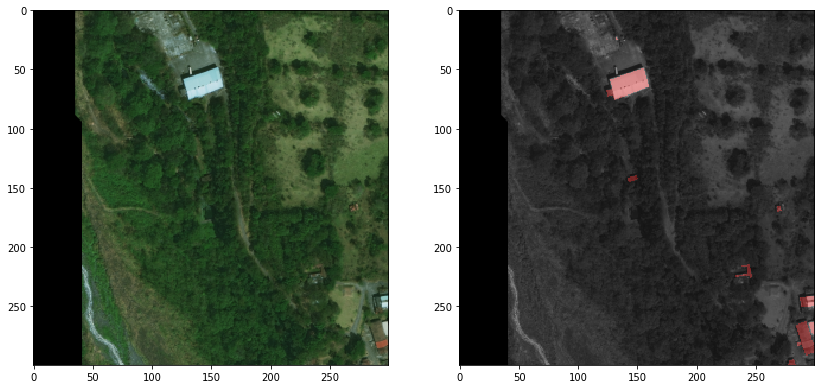

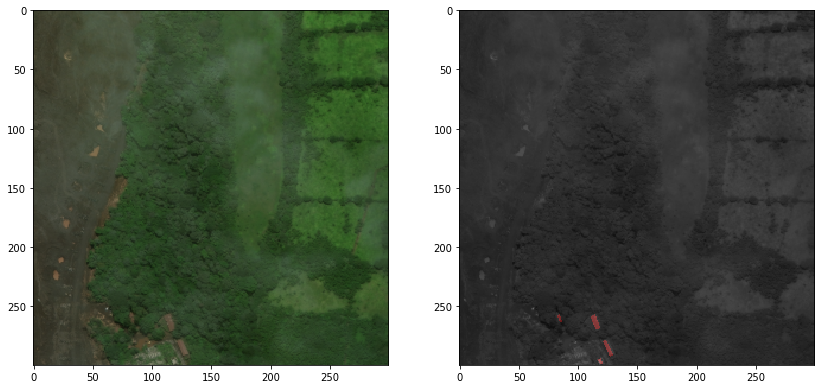

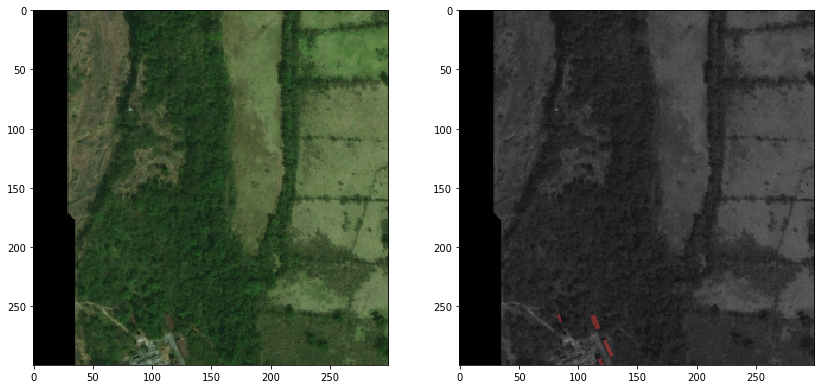

In [0]:
#bloque importante
dim = (300, 300)
for i in range(len(trn_json)-5594):
  fig, m_axs = plt.subplots(1, 2, figsize = (14,20))
  img_data, out_img = segdata(path_images, img_df, json_path, trn_json, i)
  #img_data = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)
  #out_img = cv2.resize(out_img, dim, interpolation = cv2.INTER_AREA)
  m_axs[0].imshow(img_data)
  #m_axs[1].imshow(out_img)
  m_axs[1].imshow(label2rgb(image=img_data, label=out_img, bg_label = 0))

  

# Train-Test

In [0]:
train, test = train_test_split(trn_images, test_size = 0.25, random_state = 1, shuffle = False)
#train_df = full_df[full_df['image_id'].isin(train_ids)]
#valid_df = full_df[full_df['image_id'].isin(valid_ids)]
#print(train.shape[0], 'training boxes')
#print(test.shape[0], 'validation boxes')

In [20]:
n = 600
train_n = round(n * 0.8)

#listado randonmizado
randurls_tr = np.copy(train)
randurls_ts = np.copy(test)
#np.random.seed(23)
#np.random.shuffle(randurls)#reordena todo el dataset de imagenes

#particion trn/tst
tr_urls = randurls_tr[:]
ts_urls = randurls_ts[:]

print(len(tr_urls), len(ts_urls))

4198 1400


# Pruebas de TrainTest

In [0]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

#funcion donde ingreso la imagen de entrada, saluda, la altura y el ancho
def resize(tgimg, height, width):
  #inimg = tf.image.resize(inimg, [height, width])
  tgimg = tf.image.resize(tgimg, [height, width])
      
  return tgimg

#normalizo para poder tener mis datos entre -1 a 1
def normalize(tgimg):
  #inimg = (inimg/127.5) - 1 #originalmente tengo 0 a 2, resto 1 para tener de -1 a 1
  tgimg = (tgimg/127.5) - 1
      
  return tgimg

def random_jitter(tgimg):
 #el paper recomieda que si la imagen es de 256x256, se redimencione a 286x286
  tgimg = resize(tgimg, 286, 286)
    
  #el paper recomienda que se apilen las dos imagenes de 286x286
  #para que con cropped_img sean recortadas aleatoriamente a 256x256
  #stacked_img = tf.stack([inimg, tgimg], axis = 0)
  #2 representa las 2 imagenes y 3 representa los 3 canales de colores RGB
  cropped_img = tf.image.random_crop(tgimg, size = [1, IMG_HEIGHT, IMG_WIDTH, 3]) 
    
  tgimg = cropped_img
    
  if tf.random.uniform(()) > 0.5:
    #inimg = tf.image.flip_left_right(inimg)
    tgimg = tf.image.flip_left_right(tgimg)
    
  return tgimg

#función para cargar imagenes
def load_img(filename, augment = True):
  #cast es para transformar los valores a tipo float
  #inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + '/' + filename)), 
  #                    tf.float32)[..., :3]#esto es para que se carguen todas las dimensiones 
  #pero la ultima dimension se limita a 3 que es canal RGB
  tgimg = tf.cast(tf.image.decode_png(tf.io.read_file(path_images + str(filename))), 
                      tf.float32)[..., :3]
  
  tgimg = resize(tgimg, IMG_HEIGHT, IMG_WIDTH)

  #if augment:
  #  tgimg = random_jitter(tgimg)
            
  tgimg = normalize(tgimg)
                
  return tgimg

def load_train_images(filename):
  return load_img(filename)

def load_test_images(filename):
  return load_img(filename)

In [0]:
def redim(i):
  img = Image.open(path_images + i)
  #img = imread(path_images + i)
  img_redim = img.resize((300, 300))
  plt.imshow(img_redim)
  #return img_redim

In [0]:
#se crea dataset de train
train_dataset = tf.data.Dataset.from_tensor_slices(tr_urls)
#mapea el nombre del listado con las funciones de preprocesamiento
train_dataset = train_dataset.map(load_train_images, 
                                  num_parallel_calls = tf.data.experimental.AUTOTUNE)
                                  #num_parallels_calls = tf.data.experimental.AUTOTUNE es para que TF piueda procesar en paralelo los datos

#para distribuir los datos en lotes 
#paper especifica que se use tamaño de lote de 1
train_dataset = train_dataset.batch(1)

#para que de 5 lotes de tamaño 1
train_dataset.take(1) #10

<DatasetV1Adapter shapes: (?, 256, 256, ?), types: tf.float32>

In [0]:
#se crea dataset de test
test_dataset = tf.data.Dataset.from_tensor_slices(ts_urls)
test_dataset = test_dataset.map(load_test_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

# BatchSize

In [21]:
print(len(train), '->cantidad de train')
print(len(test), '->cantidad de test')
#len(train), len(test)

4198 ->cantidad de train
1400 ->cantidad de test


In [0]:
def batch_img_gen(train, batch_size, json_path):
  out_img, out_seg = [], []
  dim = (300, 300)
  for i in np.random.permutation(train):
    img_data = imread(path_images + i)#cargo las imagenes
    img = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)#redimencionamos la imagen 300x300
    out_img +=[img] #almacenos las imagenes cargadas en una lista
    x_y = load_json_xy(json_path + i[0:-3] + 'json')#cargo las etiquetas de segmentación
    #out_seg += [np.expand_dims(rows_to_segmentationp(img_data, x_y), -1)]#expande la gráfica para que se acomode a nuevas dimensiones
    out_seg += [np.expand_dims(cv2.resize(rows_to_segmentationp(img_data, x_y), dim, interpolation = cv2.INTER_AREA), -1)]
    if len(out_img)>=batch_size:#si los datos almacenados en lista es mayor a la muestra deseada
      yield (np.stack(out_img, 0)/255.0).astype(np.float32), np.stack(out_seg, 0).astype(np.float32)#apilo las imagenes almacenadas en lista e itero
      out_img, out_seg = [], []

In [0]:
train_gen = batch_img_gen(train, 9, json_path)#genero un conjunto de 9 muestras de imágenes aleatorias 

x (9, 300, 300, 3) float32 0.0 1.0
y (9, 300, 300, 1) float32 0.0 1.289444


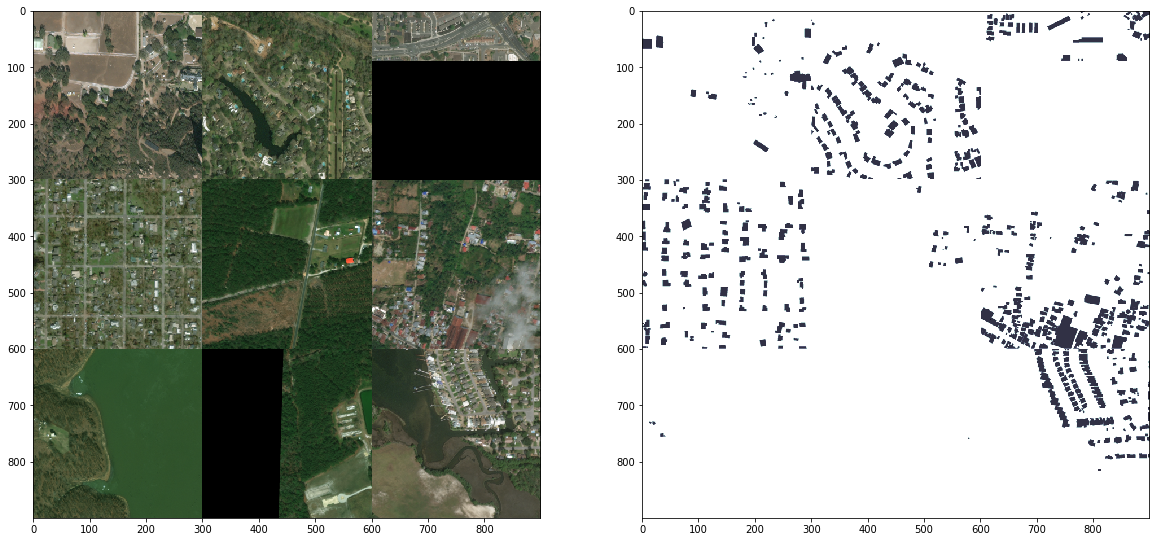

In [24]:
t_x, t_y = next(train_gen)#dispersa el conjunto de muestra
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))#creo una subgráfica
montage_rgb = lambda x: np.stack([montage2d(x[:, :, :, i]) for i in range(x.shape[3])], -1)#itero todas las imagenes almacenadas
ax1.imshow(montage_rgb(t_x))
ax2.imshow(montage2d(t_y[:, :, :, 0]), cmap = 'bone_r')

# Enmascaramos y guardamos en un path

In [0]:
#se usa para guardar los archivos en una carpeta
def mask_abd(trn_images, json_path):
    for i in np.array(trn_images):
      img_data = imread(path_images + i)#cargo las imagenes
      #out_img +=[img_data] #almacenos las imagenes cargadas en una lista
      x_y = load_json_xy(json_path + i[0:-3] + 'json')#cargo las etiquetas de segmentación
      out_seg = np.expand_dims(rows_to_segmentationp(img_data, x_y), -1)#expande la gráfica para que se acomode a nuevas dimensiones
      y = np.stack(out_seg, 0)#.astype(np.float32)
      #print('----------------------')
      #print(y.shape)
      #if len(out_img)>=batch_size:#si los datos almacenados en lista es mayor a la muestra deseada
      #  yield (np.stack(out_img, 0)/255.0).astype(np.float32), np.stack(out_seg, 0).astype(np.float32)#apilo las imagenes almacenadas en lista e itero
      #fig, (ax2) = plt.subplots(1, 1, figsize = (20, 10))#creo una subgráfica
      #ax2.imshow(y[:, :,0], cmap = 'bone_r')
      cv2.imwrite('/content/drive/My Drive/DataSets/Dataset concurso/mask/'+i, y[:, :,0])

In [0]:
para crear mascaras
mask_abd(trn_images, json_path)

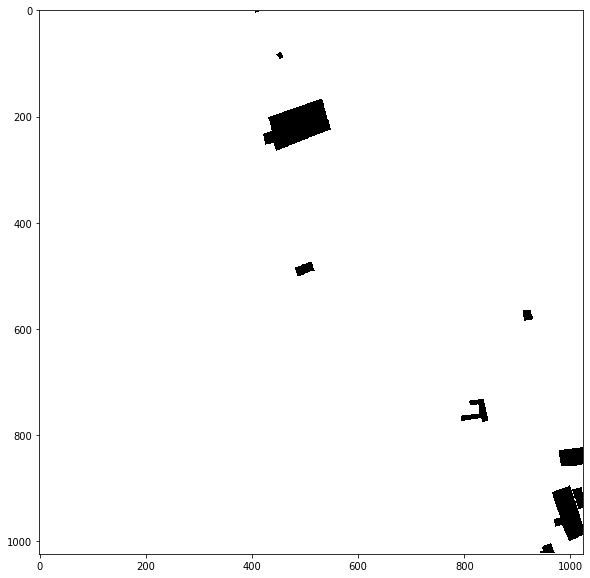

In [0]:
img = imread(msk + msk_images[0])
#img = imread('/content/drive/My Drive/DataSets/Dataset concurso/mask/guatemala-volcano_00000000_post_disaster.png')
fig, (ax2) = plt.subplots(1, 1, figsize = (20, 10))#creo una subgráfica
ax2.imshow(img, cmap = 'bone_r')

# Creamos la RedConvolucional

In [0]:
BLOCK_COUNT = 1
EDGE_CROP = 16
BASE_DEPTH = 16
SPATIAL_DROPOUT = 0.25
GAUSSIAN_NOISE = 0.1
BATCH_SIZE = 9

In [0]:
#Se crea la función para la red convolucional
def conv_bn(x, filt, dl_rate=(1,1), preblock = False):
  y = layers.Convolution2D(filt, (3, 3), 
                           activation='linear', 
                           padding='same', 
                           dilation_rate=dl_rate,
                           use_bias=False)(x)
  if preblock: return y
  y = layers.BatchNormalization()(y)
  return layers.Activation('elu')(y)

In [0]:
in_layer = layers.Input(t_x.shape[1:], name = 'RGB_Input')
pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(in_layer)
pp_in_layer = layers.BatchNormalization()(pp_in_layer)

In [0]:
c = conv_bn(pp_in_layer, BASE_DEPTH//2)
c = conv_bn(c, BASE_DEPTH//2)
c = conv_bn(c, BASE_DEPTH)

In [29]:
skip_layers = [pp_in_layer]
for j in range(BLOCK_COUNT):
  depth_steps = int(np.log2(t_x.shape[1])-2)
  d = layers.concatenate(skip_layers+[conv_bn(c, BASE_DEPTH*2**j, (2**i, 2**i), preblock=True) for i in range(depth_steps)])
  d = layers.SpatialDropout2D(SPATIAL_DROPOUT)(d)
  d = layers.BatchNormalization()(d)
  d = layers.Activation('elu')(d)
  # bottleneck
  d = conv_bn(d, BASE_DEPTH*2**(j+1))
  skip_layers += [c]
  c = d
d = layers.Convolution2D(1, (1, 1), activation='sigmoid', padding='same')(d)
d = layers.Cropping2D((EDGE_CROP, EDGE_CROP))(d)
d = layers.ZeroPadding2D((EDGE_CROP, EDGE_CROP))(d)
seg_model = models.Model(inputs = [in_layer], outputs = [d])
seg_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
RGB_Input (InputLayer)          [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
gaussian_noise (GaussianNoise)  (None, 300, 300, 3)  0           RGB_Input[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 300, 300, 3)  12          gaussian_noise[0][0]             
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 300, 300, 8)  216         batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
#creo metricas
def dice_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(y_true * y_pred, axis=[1,2,3])
  union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
  return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
def dice_p_bce(in_gt, in_pred):
  return 0.05*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, in_pred)
def true_positive_rate(y_true, y_pred):
  return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

seg_model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=dice_p_bce, metrics=[dice_coef, 'binary_accuracy', true_positive_rate])

In [0]:
#weight_path="{}_weights.best.hdf5".format('seg_model')
weight_path="{}_weights.best.hdf5".format('/content/drive/My Drive/DataSets/Dataset concurso/ckpt/seg_model2')

checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.5, 
                                  patience=3, 
                                  verbose=1, mode='max', min_delta=0.0001, cooldown=2, min_lr=1e-6)

early = EarlyStopping(monitor="val_dice_coef", 
                      mode="max", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited

callbacks_list = [checkpoint, early, reduceLROnPlat]

# Entrenamiento

In [0]:
start_time = time.time()
#with tf.device("/job:localhost/replica:0/task:0/device:GPU:0"):
seg_model.fit_generator(batch_img_gen(train, BATCH_SIZE, json_path), 
                        steps_per_epoch=min(len(train), 100),
                        epochs = 3, 
                        verbose = 1,
                        validation_data = valid_gen,
                        validation_steps = min(len(train)//BATCH_SIZE, 50),
                        callbacks=callbacks_list,
                        workers=2,
                        use_multiprocessing = True)
    
end_time = time.time() - start_time
print("Train model: {}".format(end_time))

Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 99/100 [============================>.] - ETA: 38s - loss: -0.0826 - dice_coef: 0.1282 - binary_accuracy: 0.6446 - true_positive_rate: 0.5898 WARNING:tensorflow:Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence` class.
Epoch 1/3
 50/100 [==============>...............] - ETA: 12:07 - loss: -4.2954e-04 - dice_coef: 0.0329 - binary_accuracy: 0.6178 - true_positive_rate: 0.7106
Epoch 00001: val_dice_coef improved from -inf to 0.03287, saving model to /content/drive/My Drive/DataSets/Dataset concurso/ckpt/seg_model2_weights.best.hdf5
100/100 [==============================] - 4533s 45s/step - loss: -0.0828 - dice_coef: 0.1284 - binary_accuracy: 0.6453 - true_positive_rate: 0.5912 - val_loss: -4.2954e-04 - val_dice_coef: 0.0329 - val_binary_accuracy: 0.6178 - val_true_positive_rate: 0.7106
Epoch

In [0]:
seg_model.load_weights(weight_path)
seg_model.save('full_best_model1.h5')

# CARGADO MODELO

In [0]:
seg_model.load_weights(weight_path)

In [0]:
model_path = "/content/drive/My Drive/DataSets/Dataset concurso/ckpt/full_best_model1.h5"

In [0]:
seg_model = models.load_model(model_path, compile = False)

# PREDICT

In [0]:
#Generamos Imágenes aleatorias de prueba
valid_gen = batch_img_gen(test, BATCH_SIZE, json_path)

In [0]:
t_xv, t_yv = next(valid_gen)
#if t_xv.shape[0]>16:
#  t_xv = t_xv[:16]
#  t_yv = t_yv[:16]

In [69]:
print('x', t_xv.shape, t_xv.dtype, t_xv.min(), t_xv.max())
print('y', t_yv.shape, t_yv.dtype, t_yv.min(), t_yv.max())
pred_y = seg_model.predict(t_xv)

x (9, 300, 300, 3) float32 0.0 1.0
y (9, 300, 300, 1) float32 0.0 1.0


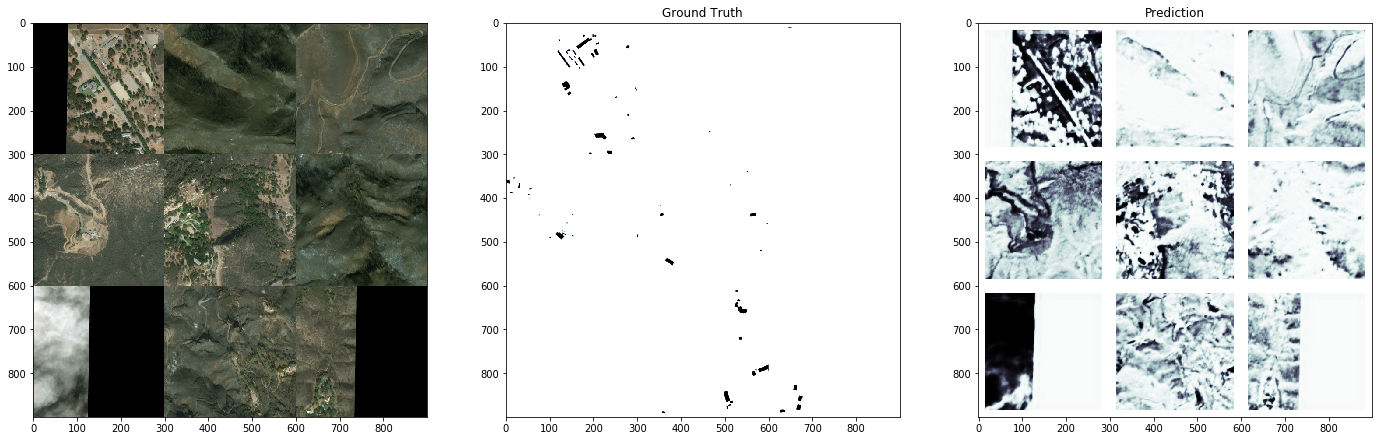

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (24, 8))
montage_rgb = lambda x: np.stack([montage2d(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ax1.imshow(montage_rgb(t_xv))
ax2.imshow(montage2d(t_yv[:, :, :, 0]), cmap = 'bone_r')
ax2.set_title('Ground Truth')
ax3.imshow(montage2d(pred_y[:, :, :, 0]), cmap = 'bone_r')
ax3.set_title('Prediction')
fig.savefig('pred_fig.png', dpi=300)

In [58]:
#Calcula con qué frecuencia las predicciones coinciden con las etiquetas.
m1 = BinaryAccuracy()
m1.update_state(t_yv, pred_y)
print('Final result: ', m1.result().numpy()) 

Final result:  0.9104247
